In [1]:
import pandas as pd
import numpy as np
import timeit
import datetime as dt
#import matplotlib.pyplot as plt
import matplotlib.pyplot as plt          
from matplotlib.backends.backend_pdf import PdfPages
#import plotly.graph_objs as go
%matplotlib inline

In [2]:
#libary getting stock data
from pandas_datareader import data as pdr

# library to forecast time series stock prices
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
import logging
logging.getLogger('fbprophet').setLevel(logging.WARNING)

In [3]:
days_to_extract = 1000
days_to_forecast = 20

In [4]:
date_end = dt.date.today()
date_start = date_end - dt.timedelta(days_to_extract)

In [5]:
date_end, date_start

(datetime.date(2021, 11, 27), datetime.date(2019, 3, 3))

In [6]:
df = pdr.DataReader("VUSA.L", 'yahoo', date_start, date_end).reset_index()

df = df.loc[df['Date'].notnull()]

In [7]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-03-04,40.632500,40.365002,40.437500,40.346249,200574.0,40.346249
1,2019-03-05,40.535000,40.299999,40.360001,40.445000,197663.0,40.445000
2,2019-03-06,40.402500,40.145000,40.334999,40.244999,146291.0,40.244999
3,2019-03-07,40.255001,39.845001,39.950001,39.982498,201919.0,39.982498
4,2019-03-08,39.935001,39.674999,39.794998,39.875000,212281.0,39.875000


In [8]:
m = Prophet()

In [9]:
df.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [10]:
#chaning columns names. fbprophet needst to get column name 'ds' for date and 'y' for value
df.columns = ['ds', 'High', 'Low', 'Open', 'y', 'Volume', 'Adj Close']
df

,ds,High,Low,Open,y,Volume,Adj Close
0,2019-03-04,40.632500,40.365002,40.437500,40.346249,200574.0,40.346249
1,2019-03-05,40.535000,40.299999,40.360001,40.445000,197663.0,40.445000
2,2019-03-06,40.402500,40.145000,40.334999,40.244999,146291.0,40.244999
3,2019-03-07,40.255001,39.845001,39.950001,39.982498,201919.0,39.982498
4,2019-03-08,39.935001,39.674999,39.794998,39.875000,212281.0,39.875000
...,...,...,...,...,...,...,...
685,2021-11-16,66.570000,65.894997,66.037498,66.547501,241887.0,66.547501
686,2021-11-17,66.477501,65.964996,66.377502,66.105003,301988.0,66.105003
687,2021-11-18,66.500000,65.800003,66.019997,66.117500,279987.0,66.117500
688,2021-11-19,66.714996,66.065002,66.442497,66.349998,237547.0,66.349998


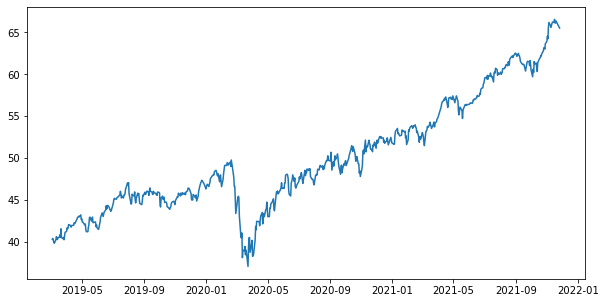

In [11]:
plt.figure(figsize=(10,5))
plt.plot(df.set_index('ds').y)
plt.show()

In [12]:
m.fit(df)

Initial log joint probability = -3.32902


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2445.22   0.000396354       363.004      0.6258      0.6258      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2469.66     0.0151733       884.724      0.1932           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2481.38   0.000238979       202.066           1           1      351   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     385       2487.07   7.27745e-05       188.373   5.156e-07       0.001      492  LS failed, Hessian reset 
     399       2487.89   0.000857407       580.345           1           1      508   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        2490.5   0.000547847       137.009           1           1      6

In [13]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1050,2022-11-22
1051,2022-11-23
1052,2022-11-24
1053,2022-11-25
1054,2022-11-26


In [14]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1050,2022-11-22,78.086254,56.666880,99.558547
1051,2022-11-23,78.102972,56.976412,99.495529
1052,2022-11-24,78.118820,57.022502,99.601398
1053,2022-11-25,78.113378,56.678351,100.088698
1054,2022-11-26,76.978815,55.177643,98.124551


In [15]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-03-04,41.786603,40.917819,42.920520,41.786603,41.786603,0.164586,0.164586,0.164586,0.315422,0.315422,0.315422,-0.150835,-0.150835,-0.150835,0.0,0.0,0.0,41.951190
1,2019-03-05,41.812960,40.661208,42.869837,41.812960,41.812960,-0.015756,-0.015756,-0.015756,0.370313,0.370313,0.370313,-0.386069,-0.386069,-0.386069,0.0,0.0,0.0,41.797204
2,2019-03-06,41.839317,40.494706,42.702221,41.839317,41.839317,-0.262772,-0.262772,-0.262772,0.351511,0.351511,0.351511,-0.614283,-0.614283,-0.614283,0.0,0.0,0.0,41.576545
3,2019-03-07,41.865674,40.362699,42.443058,41.865674,41.865674,-0.495631,-0.495631,-0.495631,0.338385,0.338385,0.338385,-0.834016,-0.834016,-0.834016,0.0,0.0,0.0,41.370044
4,2019-03-08,41.892031,40.058296,42.239854,41.892031,41.892031,-0.734079,-0.734079,-0.734079,0.309838,0.309838,0.309838,-1.043917,-1.043917,-1.043917,0.0,0.0,0.0,41.157952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,2022-11-22,76.406961,56.666880,99.558547,55.397203,97.857766,1.679294,1.679294,1.679294,0.370313,0.370313,0.370313,1.308980,1.308980,1.308980,0.0,0.0,0.0,78.086254
1051,2022-11-23,76.440474,56.976412,99.495529,55.356523,97.975976,1.662498,1.662498,1.662498,0.351511,0.351511,0.351511,1.310987,1.310987,1.310987,0.0,0.0,0.0,78.102972
1052,2022-11-24,76.473987,57.022502,99.601398,55.306492,98.099704,1.644833,1.644833,1.644833,0.338385,0.338385,0.338385,1.306447,1.306447,1.306447,0.0,0.0,0.0,78.118820
1053,2022-11-25,76.507500,56.678351,100.088698,55.251528,98.181095,1.605877,1.605877,1.605877,0.309838,0.309838,0.309838,1.296039,1.296039,1.296039,0.0,0.0,0.0,78.113378


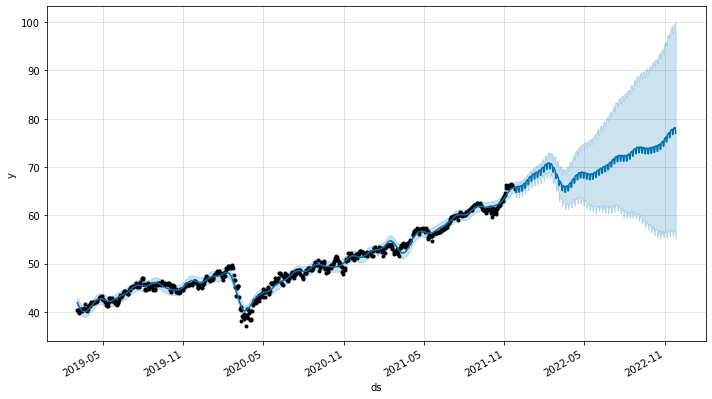

In [16]:
m.plot(forecast).autofmt_xdate()

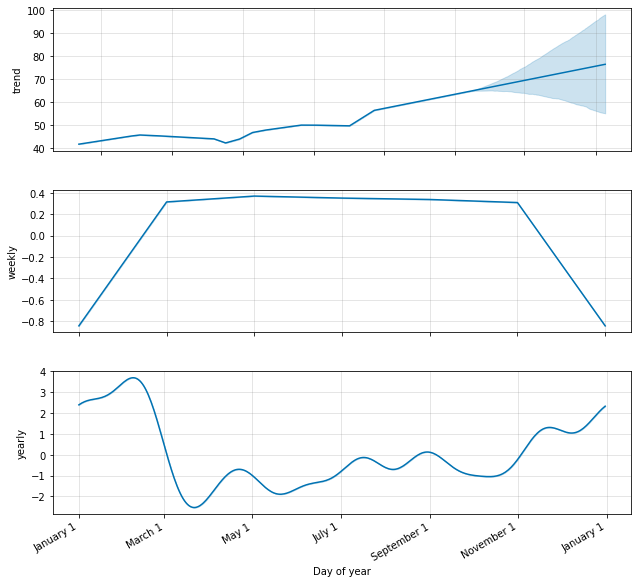

In [17]:
m.plot_components(forecast).autofmt_xdate()

In [18]:
df['log_y'] = np.log(df.y)
df['cap' ]= 90

m = Prophet(growth = 'logistic')
m.fit(df)

Initial log joint probability = -3.65552


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2384.18     0.0101982       185.412           1           1      112   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2396.63    0.00132218       139.977           1           1      223   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     207       2396.89   0.000253795       169.503    1.52e-06       0.001      265  LS failed, Hessian reset 
     299       2400.19   0.000172468       61.4439           1           1      392   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     341       2401.62   0.000274563       146.792   1.094e-06       0.001      490  LS failed, Hessian reset 
     399       2402.82   0.000270555       80.5853      0.9805      0.9805      552   
    Iter      log prob        ||dx||      ||grad||       alpha

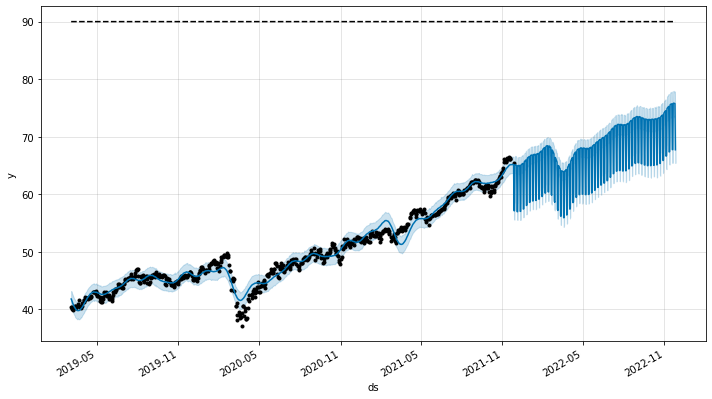

In [19]:
future = m.make_future_dataframe(periods=365)
future['cap'] = 90
fcst = m.predict(future)
m.plot(fcst).autofmt_xdate()
#m.plot(fcst, uncertainty=True).autofmt_xdate()

In [20]:
m.changepoints

22    2019-04-03
44    2019-05-08
66    2019-06-10
88    2019-07-10
110   2019-08-09
132   2019-09-11
154   2019-10-11
176   2019-11-12
198   2019-12-12
220   2020-01-16
242   2020-02-17
264   2020-03-18
287   2020-04-22
309   2020-05-26
331   2020-06-25
353   2020-07-27
375   2020-08-26
397   2020-09-28
419   2020-10-28
441   2020-11-27
463   2020-12-31
485   2021-02-02
507   2021-03-04
529   2021-04-07
551   2021-05-10
Name: ds, dtype: datetime64[ns]

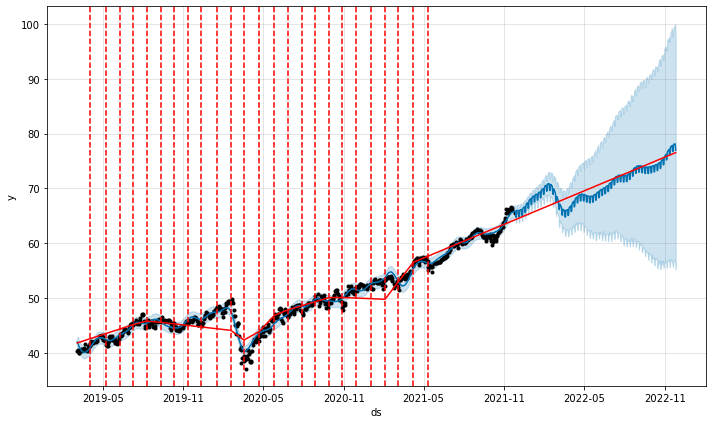

In [21]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast, threshold=0)
plt.show()

Initial log joint probability = -3.32902
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2469.31    0.00439045       2425.99      0.2784      0.2784      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2523.47     0.0105711       1403.79           1           1      229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2569.89   0.000722312       193.741           1           1      333   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2588.72   0.000529996       179.088           1           1      438   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2613.52      0.017043       1851.38           1           1      543   
    Iter      log prob        ||dx||      ||grad||       alpha  

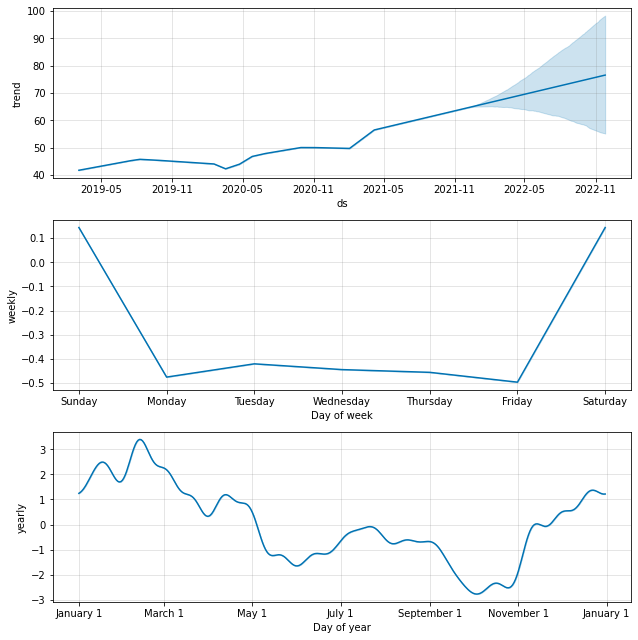

In [22]:
m = Prophet(
    # trend
    changepoint_prior_scale=0.3,
    # seasonality
    weekly_seasonality=10,
    yearly_seasonality=20,
    daily_seasonality=False
)

m.fit(df)
fig = m.plot_components(forecast)

# Plotly

In [23]:
import plotly.graph_objs as go
import plotly.offline as py

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)


In [24]:
trace = go.Scatter(
    name = 'Actual price',
    mode = 'markers',
    x = list(forecast['ds']),
    y = list(df['y']),
    marker=dict(
        color='#FFBAD2',
        line=dict(width=1)
    )
)


In [25]:
trace1 = go.Scatter(
    name = 'trend',
    mode = 'lines',
    x = list(forecast['ds']),
    y = list(forecast['yhat']),
    marker=dict(
        color='red',
        line=dict(width=3)
    )
)


In [26]:
upper_band = go.Scatter(
    name = 'upper band',
    mode = 'lines',
    x = list(forecast['ds']),
    y = list(forecast['yhat_upper']),
    line= dict(color='#57b88f'),
    fill = 'tonexty'
)

In [27]:
lower_band = go.Scatter(
    name= 'lower band',
    mode = 'lines',
    x = list(forecast['ds']),
    y = list(forecast['yhat_lower']),
    line= dict(color='#1705ff')
)

In [28]:
tracex = go.Scatter(
    name = 'Actual price',
   mode = 'markers',
   x = list(df['ds']),
   y = list(df['y']),
   marker=dict(
      color='black',
      line=dict(width=2)
   )
)

In [29]:
data = [tracex, trace1, lower_band, upper_band, trace]

layout = dict(title='Price Estimation Using FbProphet',
             xaxis=dict(title = 'Dates', ticklen=2, zeroline=True))

figure=dict(data=data,layout=layout)


In [30]:
fig = py.offline.iplot(figure)
# plt.show()

In [31]:
py.offline.plot(figure, filename='myplot.html')

'myplot.html'

import mpld3
html_str = mpld3.fig_to_html(fig)
Html_file= open("index.html","w")
Html_file.write(html_str)
Html_file.close()